# Regresión Logística

<img src="img\one.png" width="600"/>

Puede considerarse un caso especial de análisis de regresión en donde la variable dependiente es dicotómica (**Sí** [1] o **No** [0]).
Trata de estimar la probabilidad de que ocurra un suceso en función de la dependencia de otras variables. Regularmente se establece en una regresión logistica al valor de 1 a aquella situación que se desea llegar.


\begin{align*}
\Large
p_i=\frac{1}{1+e^{-f(x)}}
\end{align*}

### Tipos de regresión logística

* **Binaria**: La variable objetivo solo tiene dos posibles resultados.

* **Multinominal**: La variable objetivo escoge entre varias posibles soluciones.

* **Ordinal**: La variable objetivo escoge entre varias posibles soluciones de tipo ordinal, rankeando de 1 hasta el menor.

Los problemas de clasificación binaria tienen 4 posibles resultados:

1. **True negatives**: Correctamente se predijo un negativo (cero)
2. **True positives**: Correctamente se predijo un positivo (uno)
3. **False negatives**: Incorrectamente se predijo un negativo (cero)
4. **False positives**: Incorrectamente se predijo un positivo (uno)

## Tablas de contingencia

Para este tipo de análisis es importante el uso de las **tablas de contingencia**. Estas tablas se emplean para registrar y analizar la asociación entre dos o más variables, regularmente de tipo cualitativa.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
Genero=[]
Mano=[]

In [3]:
np.random.seed(0)

for i in range(1000):
        Genero.append(np.random.randint(0,2))
        x=np.random.rand()
        if x <= 0.87:
            Mano.append(0)
        else:
            Mano.append(1)

In [4]:
Genero[:10]

[0, 0, 1, 1, 0, 0, 0, 1, 0, 1]

In [5]:
Mano[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [6]:
lista_genero=list(map(lambda x: "M" if x==0 else "F",Genero))
lista_mano=list(map(lambda x: "Diestro" if x==0 else "Zurdo",Mano))

In [7]:
lista_genero[:10]

['M', 'M', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'F']

In [8]:
df=pd.DataFrame({"Genero":lista_genero, "Mano":lista_mano})
df.head(10)

,Genero,Mano
0,M,Diestro
1,M,Diestro
2,F,Diestro
3,F,Diestro
4,M,Diestro
5,M,Zurdo
6,M,Diestro
7,F,Diestro
8,M,Diestro
9,F,Diestro


In [9]:
df.shape

(1000, 2)

In [10]:
contingency_table=pd.crosstab(df.Genero, df.Mano)
contingency_table

Mano,Diestro,Zurdo
Genero,,
F,433,74
M,420,73


In [11]:
contingency_table.sum(axis=1)

Genero
F    507
M    493
dtype: int64

In [12]:
contingency_table.sum(axis=0)

Mano
Diestro    853
Zurdo      147
dtype: int64

In [13]:
contingency_table_sum=pd.crosstab(df.Genero, df.Mano, margins=1)
contingency_table_sum

Mano,Diestro,Zurdo,All
Genero,,,
F,433,74,507
M,420,73,493
All,853,147,1000


In [14]:
contingency_table_normalized1=pd.crosstab(df.Genero, df.Mano, normalize=1)
contingency_table_normalized1

Mano,Diestro,Zurdo
Genero,,
F,0.50762,0.503401
M,0.49238,0.496599


In [15]:
contingency_table_normalized2=pd.crosstab(df.Genero, df.Mano, normalize=0)
contingency_table_normalized2

Mano,Diestro,Zurdo
Genero,,
F,0.854043,0.145957
M,0.851927,0.148073


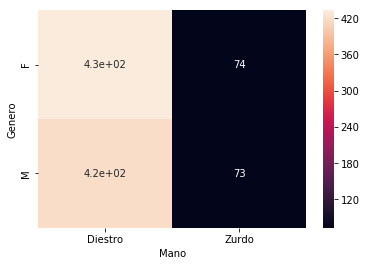

In [62]:
sns.heatmap(contingency_table, annot=True)

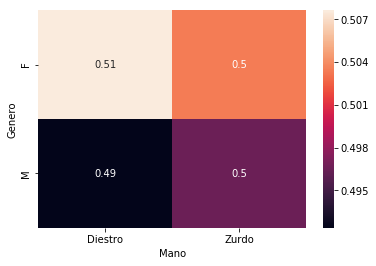

In [17]:
sns.heatmap(contingency_table_normalized1, annot=True)

## Probabilidad condicional

La probabilidad condicional es la probabilidad de que ocurra un evento A sabiendo que ocurre un evento B. En el ejemplo anterior, una probabilidad condicional sería determinar la probabilidad de que una persona fuera zurda sabiendo que es mujer. La fórmula de la probabilidad condicional es:

\begin{align*}
\Large
P(A/B)
\end{align*}

**1. ¿Cuál es la probabilidad de que una persona sea zurda sabiendo que es mujer?**

\begin{align*}
\Large
P(Zurdo/Mujer)=\frac{No.\ total\ mujeres\ zurdas}{No.\ total\ de\ mujeres\ del\ grupo}
\end{align*}

In [72]:
74/507

0.14595660749506903

**2. ¿Cuál es la probabilidad de que una persona sea mujer sabiendo que es zurda?**

\begin{align*}
\Large
P(Mujer/Zurdo)=\frac{No.\ total\ mujeres\ zurdas}{No.\ total\ de\ zurdos\ del\ grupo}
\end{align*}

In [64]:
74/147

0.5034013605442177

En probabilidad siempre existirá el caso complementario. Tomando como el ejemplo el último cálculo, podemos determinar el número de personas que **No sean mujeres** pero que **sí sean zurdas**:

**3. ¿Cuál es la probabilidad de que una persona no sea mujer sabiendo que es zurda?**

\begin{align*}
\Large
P(No\ Mujer/Zurdo)=P(Hombre/Zurdo)=\frac{No.\ total\ mujeres\ zurdas}{No.\ total\ de\ zurdos\ del\ grupo}
\end{align*}

In [70]:
1-(74/147)

0.4965986394557823

In [67]:
73/147

0.4965986394557823

**4. ¿Cuál es la probabilidad de que una persona no sea zurda sabiendo que es mujer?**

\begin{align*}
\Large
P(No\ Zurdo/Mujer)=P(Diestro/Mujer)=\frac{No.\ total\ mujeres\ zurdas}{No.\ total\ de\ zurdos\ del\ grupo}
\end{align*}

In [73]:
1-(74/507)

0.854043392504931

In [71]:
433/507

0.854043392504931

## Ratio de probabilidades (Odds ratio)

Se conoce como **ratio de probabilidades** a la relación que existe entre las probabilidades de los casos de éxito entre los casos de fracaso:

\begin{align*}
\Large
Odds_{(A/B)}=\frac{P_{A/B}}{1-P_{A/B}}\ \ \ \ \ \ \ \ \ ,\ \ \ \ \ \ \ \ \ Odds\in[0,+\infty)
\end{align*}

La relación de arriba es verdadera ya que debemos recordar que las probabilidades solo pueden ocilar entre 0 y 1. Esto hace que en el caso del númerador el valor mínimo aceptable sería 0, lo cual haría que el ratio fuera igual a cero. Caso contrario, suponiendo que la probabilidad valiera 1, haría que el denominador se volviera cero, haciendo que el ratio tienda a infinito positivo.

* **Si el ratio es mayor a 1**, es más probable el éxito que el fracaso.
* **Si el ratio es menor a 1**, es más probable el fracaso que el exito.
* **Si el ratio es igual a 1**, éxito y fracaso tienen la misma probabilidad de ocurrencia.

## De la regresión lineal a la regresión logística

Recordemos:

\begin{align*}
\Large
y=\alpha + \beta \cdot x\ \ \ \ \ \ \ \ \ ,\ \ \ \ \ \ \ \ \ x\in(-\infty,+\infty), y\in(-\infty,+\infty)
\end{align*}

En el caso de la regresión logística binaria, la variable dependiente, al ser categórica, solamente puede pertenecer al siguiente rango:

\begin{align*}
y\in[0,1]
\end{align*}

Expresar la regresión lineal, en términos de una variable categórica no es posible, por ello es que se debe recurri a la probabilidad de y:

\begin{align*}
P{(y)}\in[0,1]
\end{align*}

\begin{align*}
\Large
P{(y)}=\alpha + \beta \cdot x
\end{align*}

Sin embargo, la ecuación original de regresión lineal iba de $(-\infty,+\infty)$. Para poder manejar un rango más amplio, habrá que recurrir a ocurrencia de los casos positivos contra la de los casos negativos. Esta probabilidad es el odds ratio de y, por lo que la ecuación de regresión se representa de la siguiente forma:

\begin{align*}
\Large
\frac{P_{y}}{1-P_{y}}=\alpha + \beta \cdot x
\end{align*}

Ahora el lado izquierdo maneja valores entre $[0,+\infty)$. Hay que hacer una transformación adicional para poder manejar el mismo rango en ambos lados de la igualdad. La solución más aceptada es la adición del logaritmo natural, el cual permitirá que el lado izquierdo de la ecuación pueda manejar valores de $(-\infty,+\infty)$:

\begin{align*}
\Large
ln(\frac{P_{y}}{1-P_{y}})=\alpha + \beta \cdot x
\end{align*}

A partir de este punto, lo único que hace falta es agrupar los valores de $P_y$:

\begin{align*}
\Large
\frac{P_{y}}{1-P_{y}}=e^{\alpha + \beta \cdot x}
\end{align*}

\begin{align*}
\Large
P_{y}=e^{\alpha + \beta \cdot x}-e^{\alpha + \beta \cdot x}P_{y}
\end{align*}

\begin{align*}
\Large
P_{y}(1+e^{\alpha + \beta \cdot x})=e^{\alpha + \beta \cdot x}
\end{align*}

\begin{align*}
\Large
P_{y}=\frac{e^{\alpha + \beta \cdot x}}{1+e^{\alpha + \beta \cdot x}}
\end{align*}

\begin{align*}
\Large
P_{y}=\frac{e^{\alpha + \beta \cdot x}}{1+e^{\alpha + \beta \cdot x}}(\frac{\frac{1}{e^{\alpha + \beta \cdot x}}}{\frac{1}{e^{\alpha + \beta \cdot x}}})
\end{align*}


\begin{align*}
\Large
p_i=\frac{1}{1+e^{-f(x)}}
\end{align*}

## Ejemplo con datos aleatorios

In [19]:
#Importamos las librerias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# Creamos los datos

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

Los datos deben de estar en la forma de arreglos. Para el caso de las **x**, necesitan ser **bidimiensionales.** Esto se logra mediante el método *reshape()*. El primer valor equivale a las filas y el segundo a las columnas. El **-1** le indica a Python que utilice cuantas filas sean necesarias para poder reacomodar el arreglo.

In [21]:
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


## Creando y entrenando el modelo

In [22]:
# Creamos el clasificador

model = LogisticRegression(random_state=0)

In [23]:
# Una vez creado el modelo hay que entrenarlo
# eso se logra mediante el método fit()

model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Uno de los primeros valores que podemos obtener del modelo son las clases.
# Por ser un problema binario, el problema puede clasificar en 0 o 1.
model.classes_

array([0, 1])

In [25]:
# La intersección de la regresión y su pendiente se obtienen de la siguiente forma:

print(model.intercept_)
print(model.coef_)

[-4.12617727]
[[1.18109091]]


## Evaluando el modelo

In [26]:
# Se puede calcular las probabilidades de los datos
# mediante el uso del método predict_proba()
# Probabilidades de que los valores sean 0 o 1
model.predict_proba(x)

array([[0.98411203, 0.01588797],
       [0.95003074, 0.04996926],
       [0.85370936, 0.14629064],
       [0.64173546, 0.35826454],
       [0.35475873, 0.64524127],
       [0.1443924 , 0.8556076 ],
       [0.04924876, 0.95075124],
       [0.01565079, 0.98434921],
       [0.00485659, 0.99514341],
       [0.00149573, 0.99850427]])

In [27]:
# Para observar como el modelo predice si un valor es 0 o 1 
# se usa el método predict()

model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

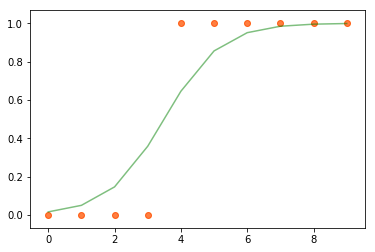

In [28]:
# Es posible observar el comportamiento del modelo mediante una gráfica
plt.scatter(x.ravel(), y, color='yellow', alpha=0.5)
plt.scatter(x.ravel(), model.predict(x), color='red', alpha=0.5)
plt.plot(x.ravel(), model.predict_proba(x)[:,1], color='green', alpha=0.5)
plt.show()

Los puntos amarillos representa los valores reales. Los puntos rojos son las clasificaciones que realizó el modelo. La linea verde es la probabilidad calculada por el modelo para poder realizar la clasificación y ubicar los valores ya sea con 0 o con 1.

In [29]:
# Para obtener la presición del modelo usamos el método score()
model.score(x,y)

1.0

Es posible obtener más información a partir del uso de una matriz de confusión. Esta nos mostrará las combinaciones existentes entre las predicciones y los resultados reales:

In [30]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

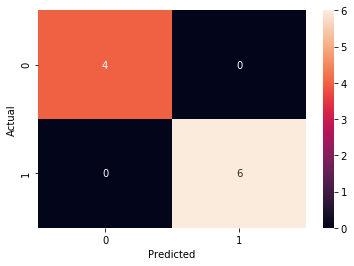

In [31]:
confusion_matrix = pd.crosstab(y, model.predict(x), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [32]:
confusion_matrix

Predicted,0,1
Actual,,
0,4,0
1,0,6


In [33]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Ejemplo usando datos  reales

El siguiente modelo sirve para determinar si un alumno debe o no ser admitido a una universidad de acuerdo a sus resultados en el GMAT, el examen psicométrico, y los años de experiencia profesional.

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [35]:
# Los datos están almacenados en listas

gmat=[780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,
      610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,
      640,620,660,660,680,650,670,580,590,690]
gpa=[4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,
     2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,
     3.3,3.3,2.3,2.7,3.3,1.7,3.7]
work_exp=[3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,
          2,6,5,1,2,4,6,5,1,2,1,4,5]

#0=no, 1=si
admitted=[1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,
          0,1,1,0,0,1,1,1,0,0,0,0,1]


In [36]:
# Creamos el DataFrame, pasando los datos en la forma de un diccionario

candidates = {'gmat': gmat,'gpa': gpa,'work_experience': work_exp,'admitted': admitted}

In [37]:
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1


In [38]:
df.to_csv("Datasets/Candidatos.csv")

Creamos el modelo de regresion logistica, para ello hay que separar las variables predictoras (features) de la variable objetivo (target)

In [39]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

In [40]:
# Creamos los grupos de entrenamiento y de prueba.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [41]:
# Creamos el modelo de regresión
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# Realizamos predicciones a partir del set de datos de prueba
y_pred=logistic_regression.predict(X_test)

In [43]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

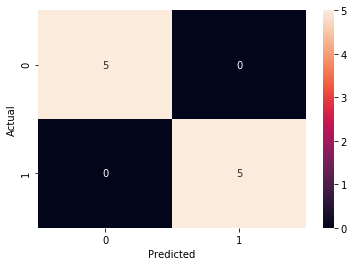

In [44]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [45]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


Supongamos ahora que existe un nuevo grupo de estudiantes interesados en ingresar a la universidad. Los valores para cada uno de ellos es el siguiente:

In [46]:
new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])

In [47]:
df = pd.read_csv("Datasets/Candidatos.csv")
df.head()

,Unnamed: 0,gmat,gpa,work_experience,admitted
0,0,780,4.0,3,1
1,1,750,3.9,4,1
2,2,690,3.3,3,1
3,3,710,3.7,5,1
4,4,680,3.9,4,1


In [48]:
df.drop(df.columns[0],axis=1, inplace=True)
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1


In [49]:
# En esta ocasión, no dividiremos los datos, ya que se tienen 2 DataFrames.
# El histórico de candidatos servirá como fase de entrenamiento
# Los nuevos 

X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

x_new = df2[['gmat', 'gpa','work_experience']]

logistic_regression= LogisticRegression()
logistic_regression.fit(X,y)

y_pred2=logistic_regression.predict(x_new)


In [50]:
y_pred2

array([0, 1, 1, 0, 1], dtype=int64)

## Ejemplo 2

In [51]:
# Importamos las librerías

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [52]:
# Importamos el dataset

dataset = pd.read_csv('Datasets/User_Data.csv') 
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [53]:
# Variables de entrada
x = dataset.iloc[:, [2, 3]].values

In [54]:
# Variable objetivo 
y = dataset.iloc[:, 4].values

In [55]:
# Creamos los grupos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
        x, y, test_size = 0.25, random_state = 0) 

In [56]:
# Como los datos de entrada manejan diferentes escalas, es necesario
# normalizarlos.

from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest) 

print(xtrain[0:10,:])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [57]:
# Entrenamos el modelo

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# Realizamos predicciones con el modelo
y_pred = classifier.predict(xtest) 

In [59]:
# Generamos la matriz de confusión
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [60]:
# Revisamos la precisión del modelo
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 

Accuracy :  0.89


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


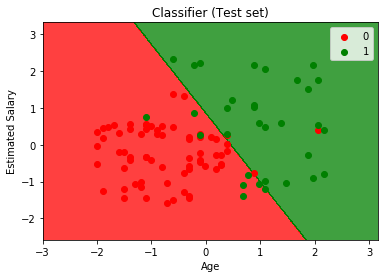

In [61]:
# Graficamos la clasificación obtenida por el modelo

from matplotlib.colors import ListedColormap 
X_set, y_set = xtest, ytest 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,  
                               stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1,  
                               stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict( 
             np.array([X1.ravel(), X2.ravel()]).T).reshape( 
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), label = j) 
    
plt.title('Classifier (Test set)') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show() 